
## Etapa 1: Redimensionamento e Conversão para Escala de Cinza

Nessa etapa, vai ser realizado duas operações principais em uma imagem do dataset para as letras A, B e C:

1. **Redimensionamento das Imagens**: Todas as imagens serão redimensionadas para um tamanho fixo de `200x200 px` para ter uma consistência na análise posterior.
2. **Conversão para Escala de Cinza**: As imagens coloridas serão convertidas para **escala de cinza** para simplificar a análise, removendo as informações de cor.

## Passos:

1. **Leitura das Imagens**: As imagens de cada letra (A, B, C) foram lidas a partir da pasta correspondente.
2. **Redimensionamento**: Cada imagem foi redimensionada para `200x200 px` usando o OpenCV.
3. **Conversão para Escala de Cinza**: As imagens foram convertidas para escala de cinza para reduzir a complexidade e facilitar o processamento posterior.

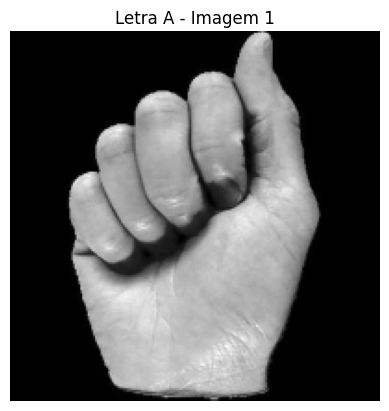

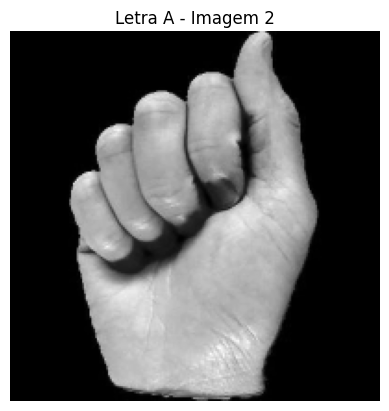

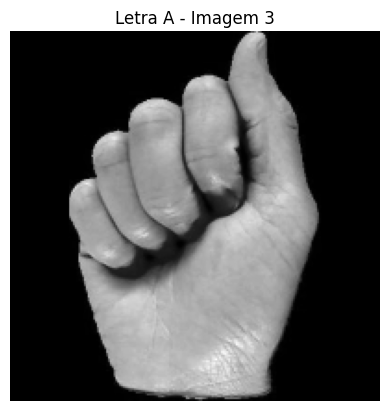

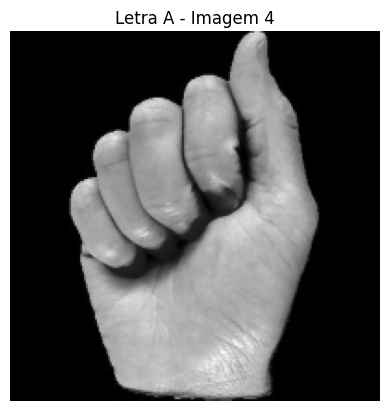

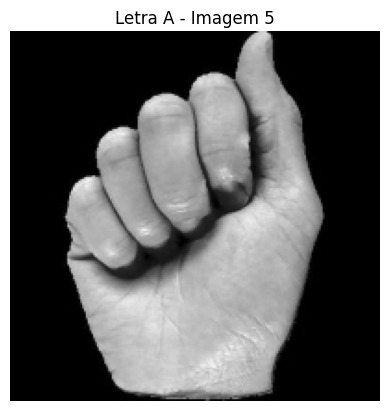

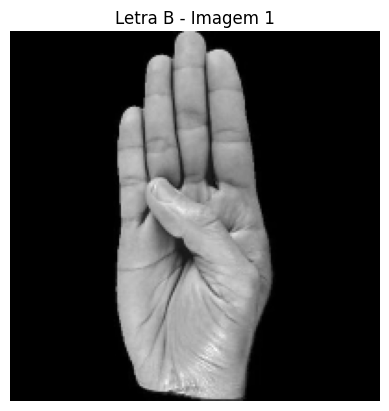

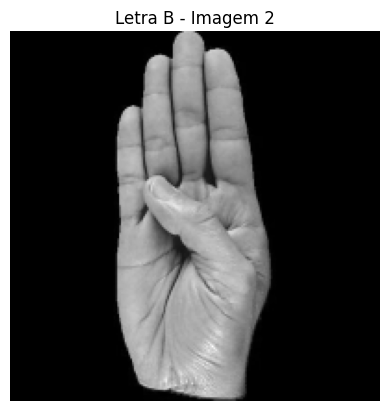

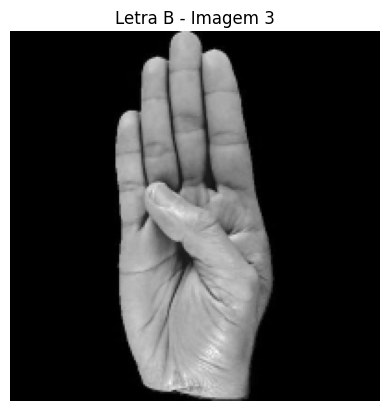

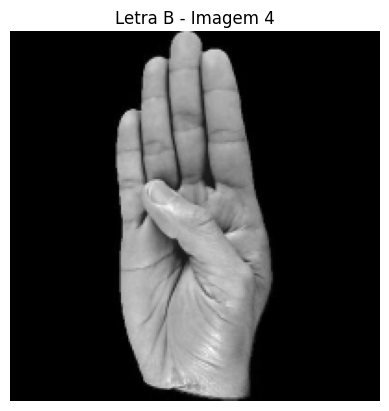

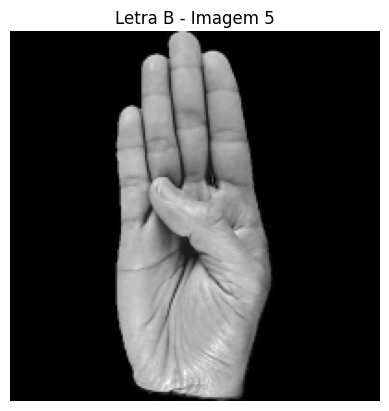

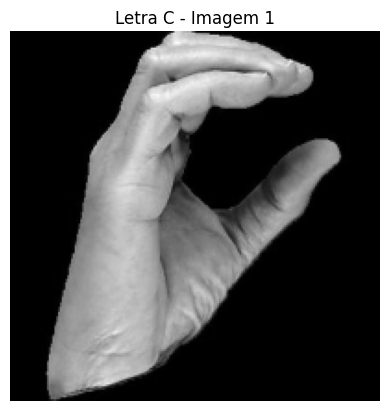

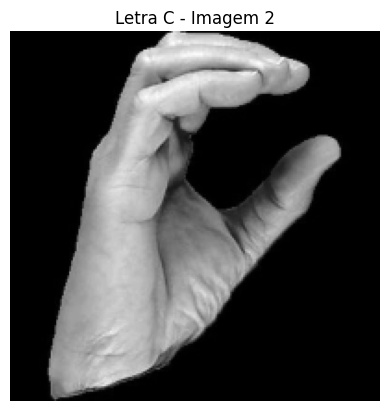

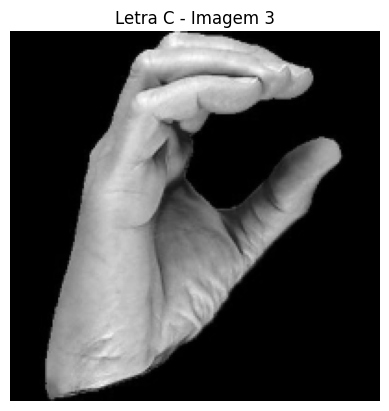

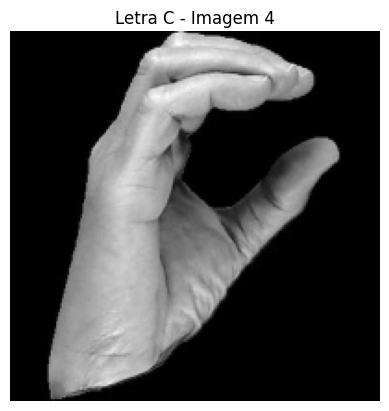

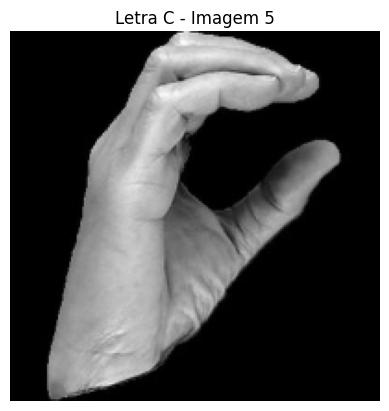

In [36]:
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path

base_path = Path("dataset")
letters = ['A', 'B', 'C']
output_path = Path("images_result")

def resize(path_img):
    img = cv2.imread(str(path_img))
    img_resize = cv2.resize(img, (200, 200))
    return img_resize

def to_gray_scale(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_gray

def process_img(path_img):
    img_resized = resize(path_img)
    img_gray_resized = to_gray_scale(img_resized)
    return img_gray_resized

resized_gray_dir = output_path / 'resized_gray'
os.makedirs(resized_gray_dir, exist_ok=True)

for letter in letters:
    dir = base_path / letter

    images = os.listdir(dir)[:5]

    for idx, img in enumerate(images, 1):
        img_path = dir / img

        processed_img = process_img(img_path)

        plt.imshow(processed_img, cmap='gray')
        plt.title(f'Letra {letter} - Imagem {idx}')
        plt.axis('off')
        plt.show()

        out_file = output_path / 'resized_gray' / f'{letter}{idx}.png'
        cv2.imwrite(str(out_file), processed_img)



## Etapa 2: Detecção de bordas com Canny

Nesta etapa, vamos aplicar o algoritmo **Canny** para detectar as bordas nas imagens das letras A, B e C. A detecção de bordas é uma técnica importante em visão computacional, usada para identificar transições abruptas de intensidade de cor em uma imagem.

### Passos:

1. **Leitura das Imagens**: As imagens de cada letra (A, B, C) foram lidas a partir da pasta correspondente.
2. **Aplicação do Canny**: Utilizamos o algoritmo de detecção de bordas **Canny** para identificar as bordas nas imagens convertidas para escala de cinza.
3. **Visualização**: A imagem resultante da detecção de bordas será exibida para avaliação do desempenho da detecção.

O Canny utiliza dois limiares (lower e upper) para detectar bordas e realizar a supressão de não-máximos, garantindo que as bordas detectadas sejam bem definidas.

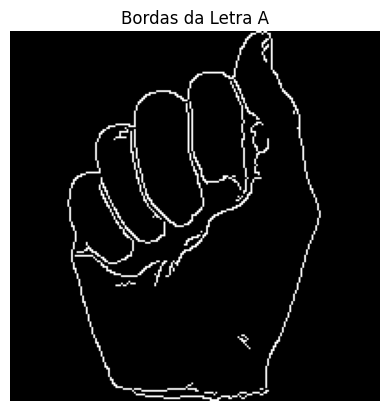

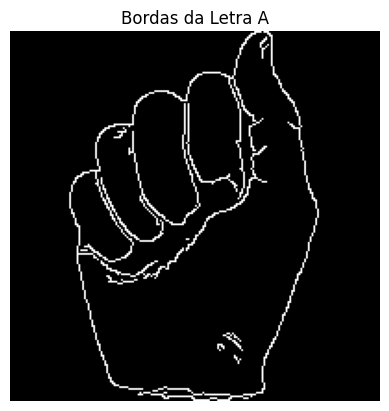

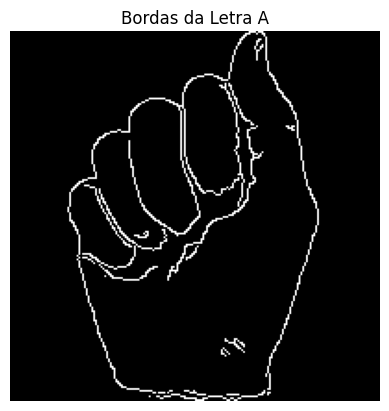

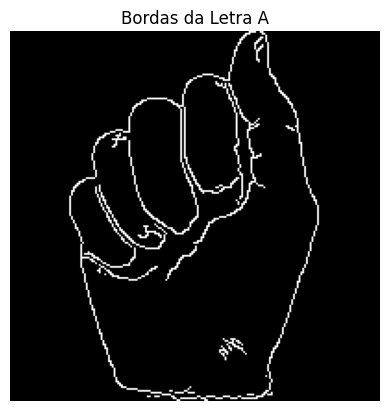

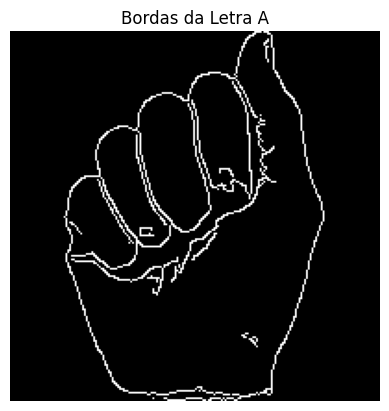

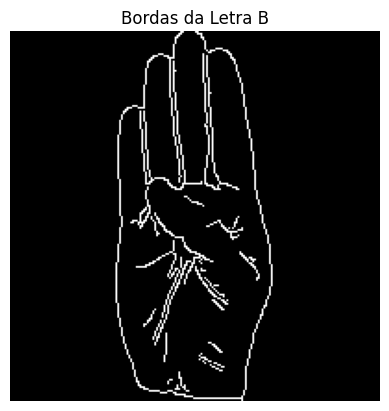

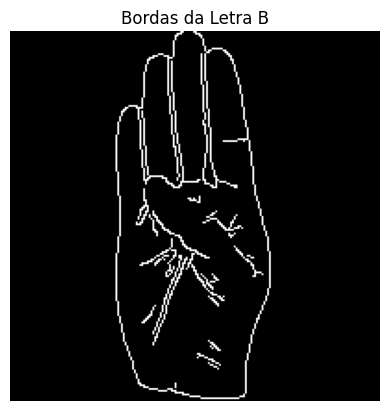

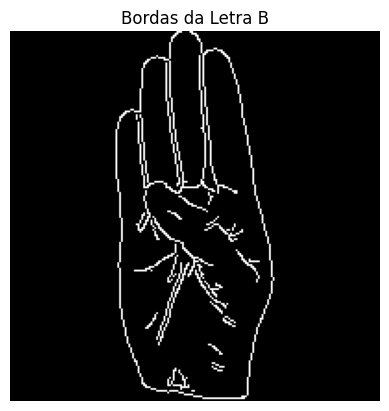

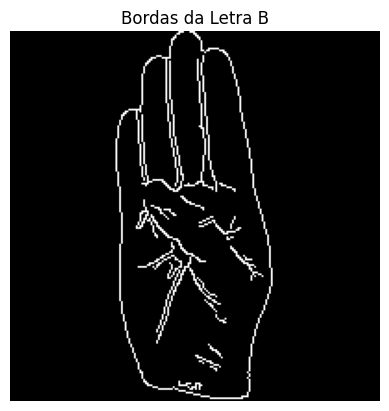

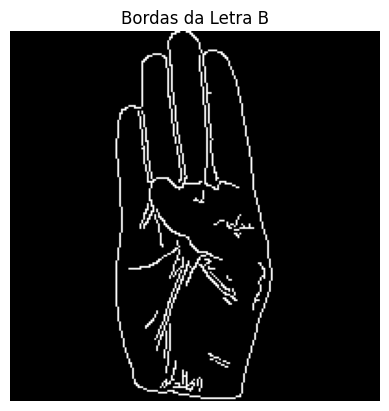

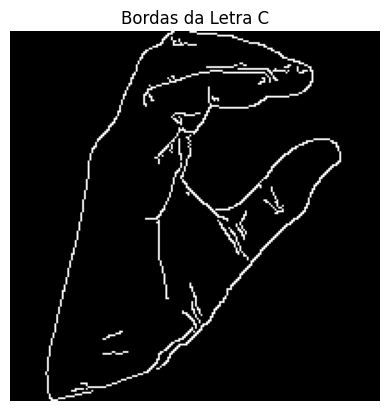

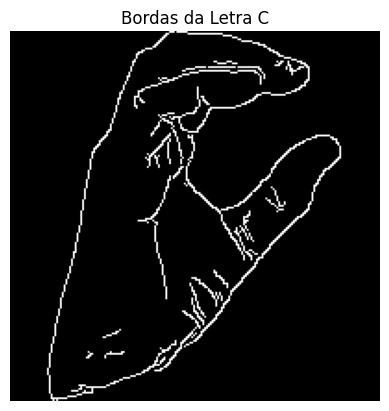

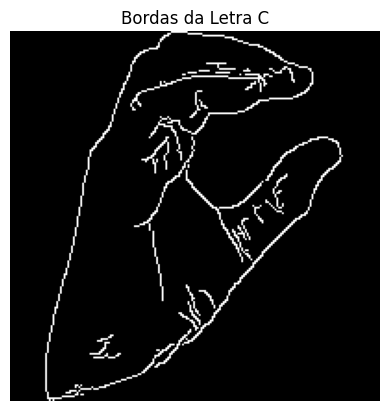

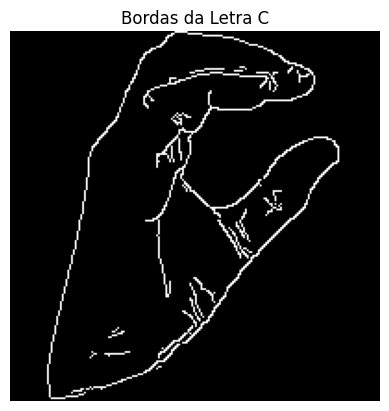

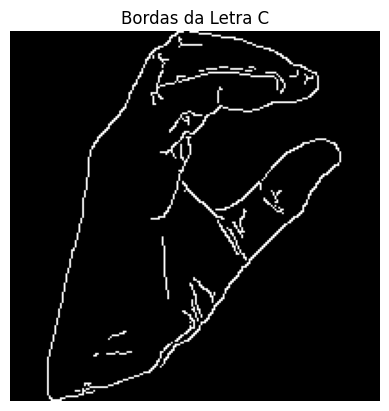

In [37]:
import cv2
import os
import matplotlib.pyplot as plt

input_path = 'images_result/resized_gray/'
output_path = 'images_result/canny_border/'

os.makedirs(output_path, exist_ok=True)

letters = ['A', 'B', 'C']
img_names = [f'{letter}{i}.png' for letter in letters for i in range(1, 6)]

def apply_canny(img):
    edges = cv2.Canny(img, 100, 200)
    return edges

for img_name in img_names:

    img_path = os.path.join(input_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    edges = apply_canny(img)

    plt.imshow(edges, cmap='gray')
    plt.title(f'Bordas da Letra {img_name[0]}')
    plt.axis('off')
    plt.show()

    out_file = os.path.join(output_path, img_name)
    cv2.imwrite(out_file, edges)


## Etapa 3: Comparação de contornos com Shape Matching
Nesta etapa, comparamos os contornos das letras A, B e C usando a função **cv2.matchShapes** do OpenCV.

## Passos:
Leitura das Imagens: Imagens com bordas (Canny) carregadas da pasta images_result/canny_border/.

Extração de Contornos: Usamos cv2.findContours para obter os contornos das letras.

Comparação: Aplicamos cv2.matchShapes para comparar os pares A–B, A–C e B–C.

Resultado: Quanto menor o valor retornado, maior a semelhança entre os contornos.

1. **Leitura das Imagens**: Imagens com bordas (Canny) carregadas da pasta images_result/canny_border/.
2. **Extração de Contornos**: Usamos cv2.findContours para obter os contornos das letras.
3. **Comparação**: Aplicamos cv2.matchShapes para comparar os pares A–B, A–C e B–C.
4. **Resultado**: Quanto menor o valor retornado, maior a semelhança entre os contornos.

In [38]:
import cv2
import os

input_path = 'images_result/canny_border/'

def get_main_contour(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return max(contours, key=cv2.contourArea)

def load_contour(name):
    img_path = os.path.join(input_path, f'{name}.png')
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return get_main_contour(img)

names = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']

contours = {name: load_contour(name) for name in names}

direct_pairs = [('A1', 'A2'), ('B1', 'B2'), ('C1', 'C2')]

for a, b in direct_pairs:
    result = cv2.matchShapes(contours[a], contours[b], cv2.CONTOURS_MATCH_I1, 0.0)
    print(f'Similaridade {a} vs {b}: {result}')

print('=================================')

for a in ['A1', 'A2']:
    for other in ['B1', 'C1']:
        result = cv2.matchShapes(contours[a], contours[other], cv2.CONTOURS_MATCH_I1, 0.0)
        print(f'Similaridade {a} vs {other}: {result}')


Similaridade A1 vs A2: 162.18332255941976
Similaridade B1 vs B2: 30.163005782805044
Similaridade C1 vs C2: 1.5026820760911552
Similaridade A1 vs B1: 107.29552167675858
Similaridade A1 vs C1: 97.05271045747823
Similaridade A2 vs B1: 72.37252064024707
Similaridade A2 vs C1: 79.82000771411293



## Etapa Geral: Pré-processamento Completo da Imagem

Pipeline de Pré-Processamento de Imagens – Letras A, B e C

Neste notebook, realizamos um pipeline de pré-processamento em imagens da Língua de Sinais Americana (ASL), especificamente para as letras A, B e C.
 Etapas Realizadas:

    Leitura das Imagens
    As imagens são carregadas a partir das subpastas do dataset, separadas por letra.

     Redimensionamento
     Todas as imagens serão redimensionadas para um tamanho fixo de 200x200 px para ter uma consistência na análise posterior.

     Conversão para Escala de Cinza
    As imagens coloridas serão convertidas para **escala de cinza** para simplificar a análise, removendo as informações de cor.

     Ajuste de Brilho e Contraste
    Aplicação de ajustes personalizados para melhorar a visibilidade das regiões de interesse nas imagens.

     Limiarização (Thresholding)
    Aplicação do método de Otsu para segmentar objetos em primeiro plano, separando-os do fundo.

     Segmentação por Cor em HSV
    Detecção de regiões da pele com base em um intervalo HSV, destacando as mãos nas imagens.

     Detecção de Contornos e Caixas Delimitadoras
    Identificação dos contornos dos objetos e desenho de bounding boxes com a respectiva área anotada.

     Visualização e Salvamento de Resultados
    Para cada imagem, é gerado um grid comparativo com todas as etapas aplicadas e salvo para análise posterior.

Passos:

Leitura das Imagens: As imagens de cada letra (A, B, C) foram lidas a partir da pasta correspondente.

Redimensionamento: Cada imagem foi redimensionada para 200x200 px usando o OpenCV.

Conversão para Escala de Cinza: As imagens foram convertidas para escala de cinza para reduzir a complexidade e facilitar o processamento posterior.

Ajuste de Brilho/Contraste: Um leve ajuste de brilho (+10) e contraste (+20) foi aplicado para realçar as regiões relevantes da imagem.

Thresholding (Otsu): Aplicada a técnica de Otsu para destacar as regiões da mão e separar o fundo.

Segmentação de Cor (HSV): Realizada para isolar áreas com tonalidades de pele humana.

Detecção de Contornos: Utilizou-se cv2.findContours para identificar objetos e desenhar caixas delimitadoras ao redor de contornos relevantes.

Visualização Final: Todas as etapas acima são exibidas em subplots e salvas automaticamente em disco para referência.


=== Verificação do Dataset ===
Letra A: 10 imagens
Letra B: 5 imagens
Letra C: 5 imagens

Total de imagens a processar: 20

=== Iniciando Processamento ===
Processando: dataset\A\hand1_a_bot_seg_1_cropped.jpeg


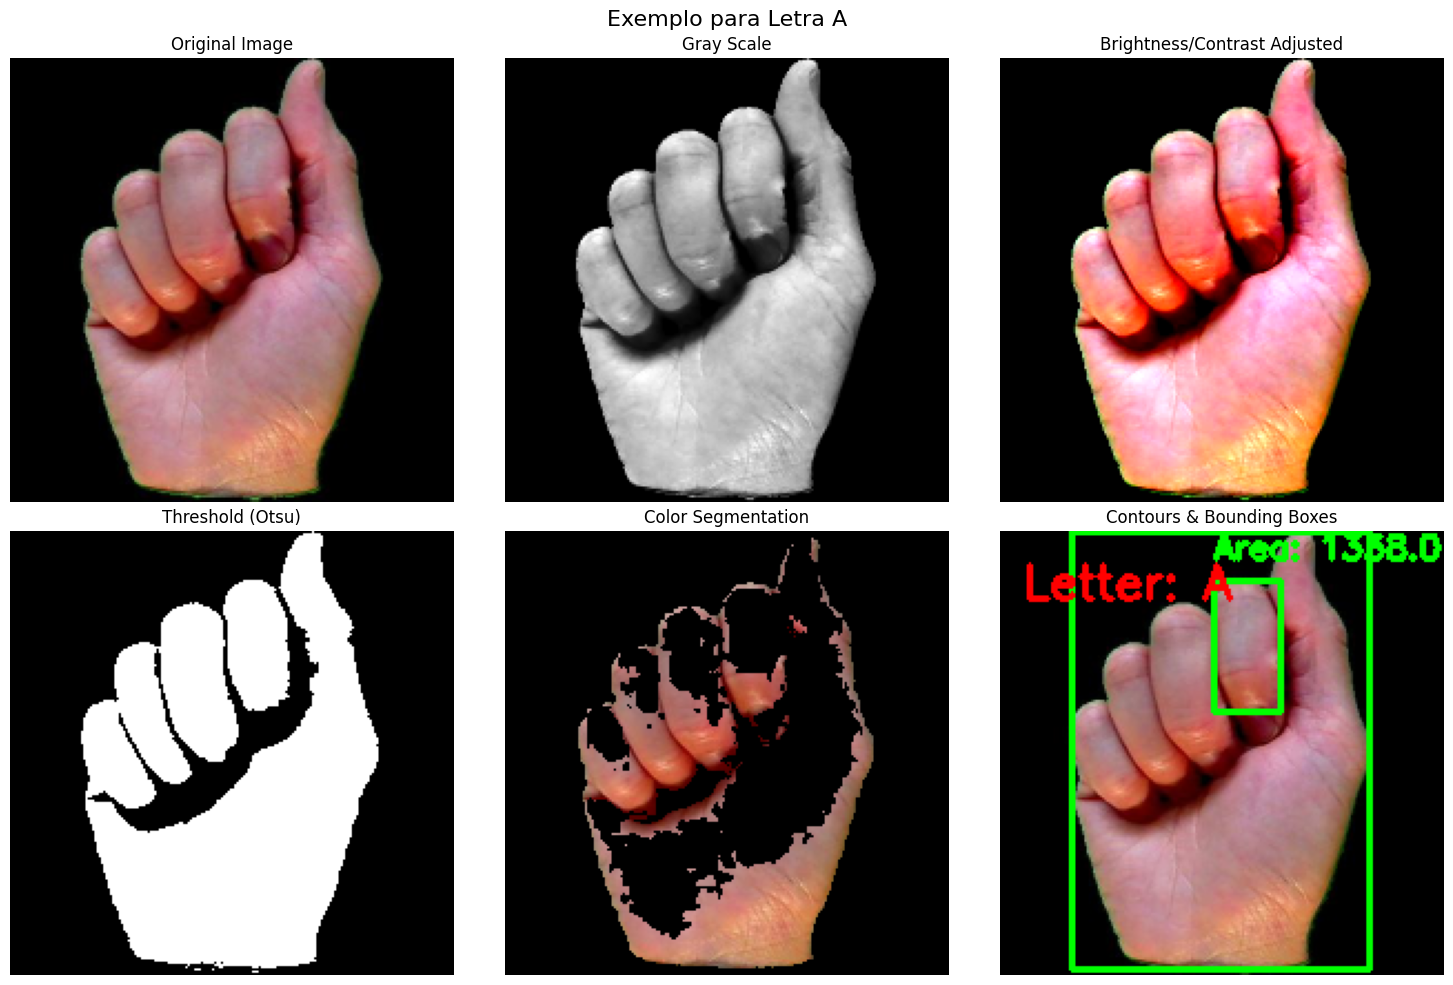

Processando: dataset\A\hand1_a_bot_seg_2_cropped.jpeg
Processando: dataset\A\hand1_a_bot_seg_3_cropped.jpeg
Processando: dataset\A\hand1_a_bot_seg_4_cropped.jpeg
Processando: dataset\A\hand1_a_bot_seg_5_cropped.jpeg
Processando: dataset\A\hand1_a_dif_seg_1_cropped.jpeg
Processando: dataset\A\hand1_a_dif_seg_2_cropped.jpeg
Processando: dataset\A\hand1_a_dif_seg_3_cropped.jpeg
Processando: dataset\A\hand1_a_dif_seg_4_cropped.jpeg
Processando: dataset\A\hand1_a_dif_seg_5_cropped.jpeg
Processando: dataset\B\hand1_b_bot_seg_1_cropped.jpeg


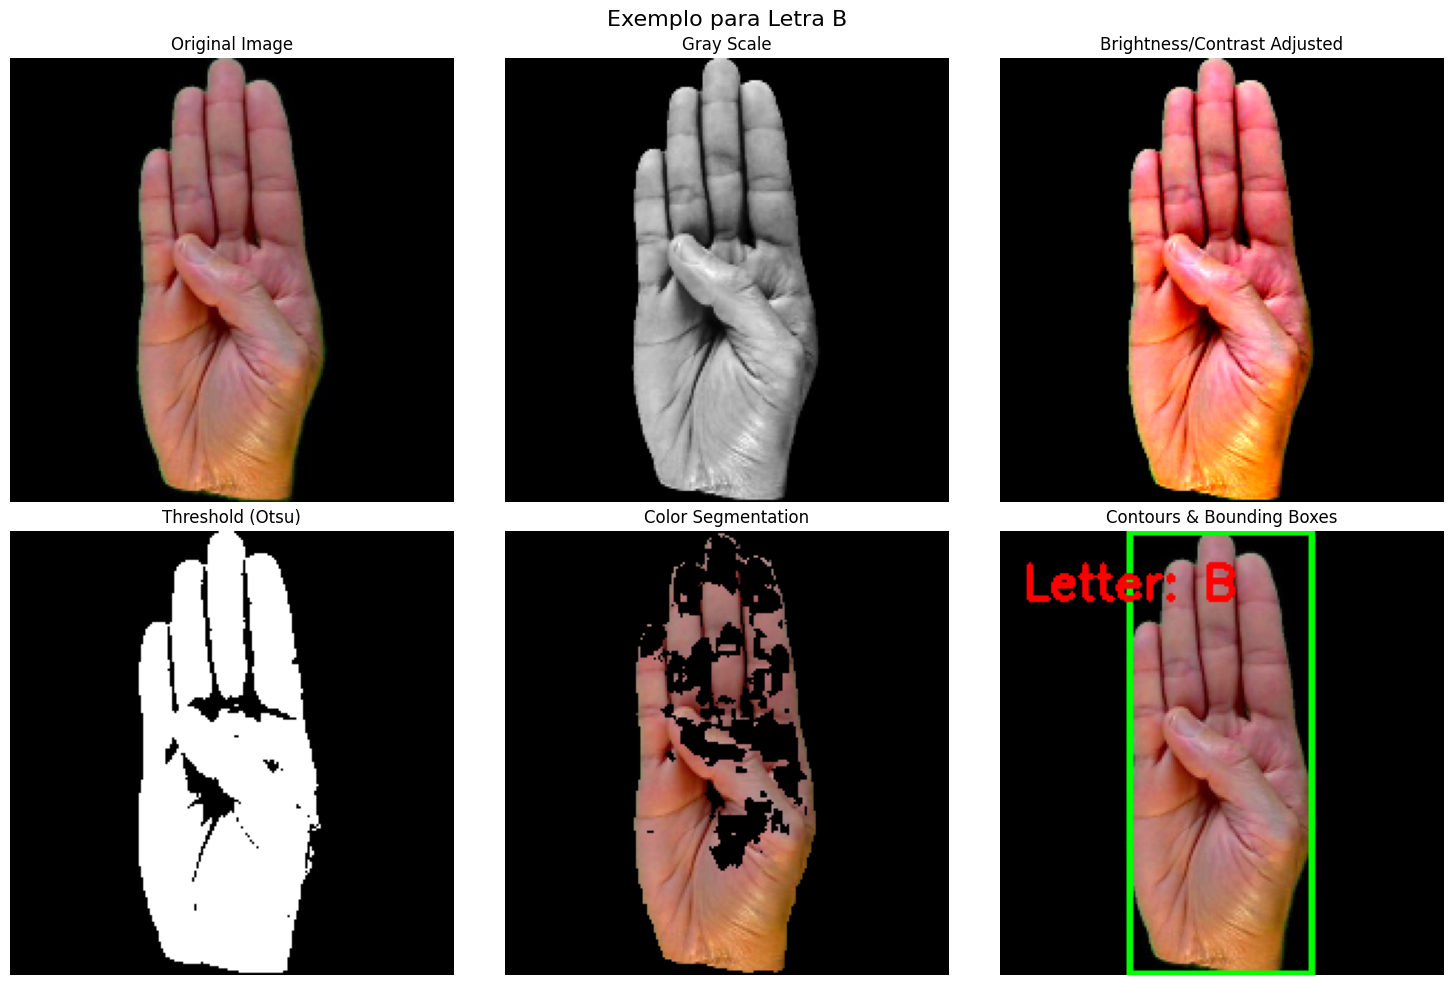

Processando: dataset\B\hand1_b_bot_seg_2_cropped.jpeg
Processando: dataset\B\hand1_b_bot_seg_3_cropped.jpeg
Processando: dataset\B\hand1_b_bot_seg_4_cropped.jpeg
Processando: dataset\B\hand1_b_bot_seg_5_cropped.jpeg
Processando: dataset\C\hand1_c_bot_seg_1_cropped.jpeg


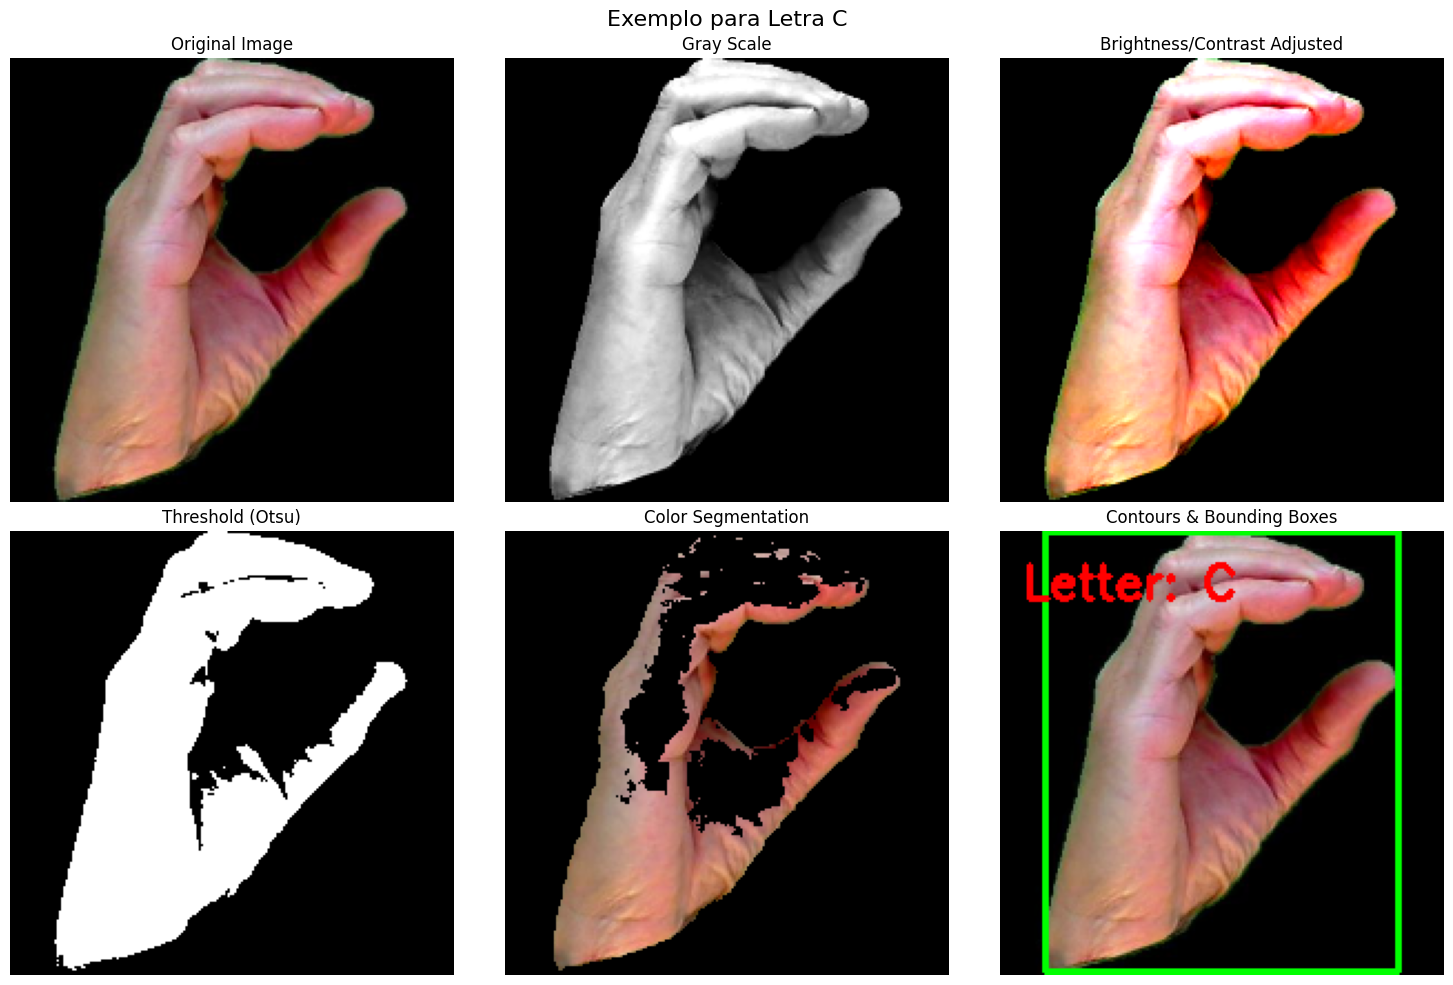

Processando: dataset\C\hand1_c_bot_seg_2_cropped.jpeg
Processando: dataset\C\hand1_c_bot_seg_3_cropped.jpeg
Processando: dataset\C\hand1_c_bot_seg_4_cropped.jpeg
Processando: dataset\C\hand1_c_bot_seg_5_cropped.jpeg

Processamento concluído! Todas as imagens foram salvas em: images_result\processed


In [39]:
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Configuração dos paths
base_path = Path("dataset")
letters = ['A', 'B', 'C']
output_path = Path("images_result")
output_path.mkdir(parents=True, exist_ok=True)
(output_path / 'processed').mkdir(parents=True, exist_ok=True)

# Função para criar e salvar o grid combinado
def save_combined_plot(processed_imgs, letter, output_dir, img_name):
    """Cria e salva uma imagem combinada com todos os subplots"""
    plt.figure(figsize=(15, 10))

    subplots = [
        {'key': 'original', 'title': 'Original Image', 'cmap': None},
        {'key': 'gray', 'title': 'Gray Scale', 'cmap': 'gray'},
        {'key': 'adjusted', 'title': 'Brightness/Contrast Adjusted', 'cmap': None},
        {'key': 'threshold', 'title': 'Threshold (Otsu)', 'cmap': 'gray'},
        {'key': 'color_seg', 'title': 'Color Segmentation', 'cmap': None},
        {'key': 'with_boxes', 'title': 'Contours & Bounding Boxes', 'cmap': None}
    ]

    for i, plot in enumerate(subplots, start=1):
        plt.subplot(2, 3, i)
        img = processed_imgs[plot['key']]
        if plot['cmap'] is None and len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img, cmap=plot['cmap'])
        plt.title(plot['title'])
        plt.axis('off')

    plt.suptitle(f'Processamento para Letra {letter} - {img_name}', fontsize=16)
    plt.tight_layout()
    output_file = output_dir / f'{letter}_{img_name}_combined.png'
    plt.savefig(str(output_file), bbox_inches='tight', dpi=100)
    plt.close()

# Funções de processamento (mantidas as mesmas)
def adjust_brightness_contrast(img, brightness=0, contrast=0):
    brightness = brightness * 2.55
    contrast = contrast * 2.55

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha = (highlight - shadow)/255
        gamma = shadow
        img = cv2.addWeighted(img, alpha, img, 0, gamma)

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

    return img

def apply_thresholding(img, method='otsu'):
    if method == 'otsu':
        _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elif method == 'adaptive':
        thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    else:
        _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    return thresh

def color_segmentation_hsv(img, lower_hsv, upper_hsv):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
    result = cv2.bitwise_and(img, img, mask=mask)
    return result, mask

def find_contours_and_draw_boxes(img, original_img=None, min_area=500):
    img_with_boxes = original_img.copy() if original_img is not None else img.copy()
    if len(img_with_boxes.shape) == 2:
        img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_GRAY2BGR)

    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > min_area:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(img_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img_with_boxes, f'Area: {area}', (x, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return img_with_boxes

def resize(path_img):
    img = cv2.imread(str(path_img))
    img_resize = cv2.resize(img, (200, 200))
    return img_resize

def to_gray_scale(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_gray

def process_img(path_img, letter):
    img_resized = resize(path_img)
    img_adjusted = adjust_brightness_contrast(img_resized.copy(), brightness=10, contrast=20)
    img_gray = to_gray_scale(img_adjusted.copy())
    img_thresh = apply_thresholding(img_gray.copy(), method='otsu')

    lower_skin = np.array([0, 48, 80], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)
    img_color_seg, mask_color = color_segmentation_hsv(img_resized.copy(), lower_skin, upper_skin)

    img_with_boxes = find_contours_and_draw_boxes(img_thresh.copy(), img_resized.copy())
    cv2.putText(img_with_boxes, f'Letter: {letter}', (10, 30),
               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    return {
        'original': img_resized,
        'gray': img_gray,
        'adjusted': img_adjusted,
        'threshold': img_thresh,
        'color_seg': img_color_seg,
        'color_mask': mask_color,
        'with_boxes': img_with_boxes
    }

# Verificação inicial do dataset
print("=== Verificação do Dataset ===")
total_imgs = 0
for letter in letters:
    dir = base_path / letter
    count = len(os.listdir(dir))
    print(f"Letra {letter}: {count} imagens")
    total_imgs += count
print(f"\nTotal de imagens a processar: {total_imgs}\n")

# Processamento principal
print("=== Iniciando Processamento ===")
example_shown = {letter: False for letter in letters}  # Controla exemplos mostrados

for letter in letters:
    dir = base_path / letter

    for img_file in os.listdir(dir):
        img_path = dir / img_file
        img_name = os.path.splitext(img_file)[0]

        print(f"Processando: {img_path}")
        processed_imgs = process_img(img_path, letter)

        # Salva o grid combinado
        save_combined_plot(processed_imgs, letter, output_path / 'processed', img_name)

        # Mostra apenas o primeiro exemplo de cada letra
        if not example_shown[letter]:
            plt.figure(figsize=(15, 10))

            # Recria os subplots para exibição
            subplots = [
                {'key': 'original', 'title': 'Original Image', 'cmap': None},
                {'key': 'gray', 'title': 'Gray Scale', 'cmap': 'gray'},
                {'key': 'adjusted', 'title': 'Brightness/Contrast Adjusted', 'cmap': None},
                {'key': 'threshold', 'title': 'Threshold (Otsu)', 'cmap': 'gray'},
                {'key': 'color_seg', 'title': 'Color Segmentation', 'cmap': None},
                {'key': 'with_boxes', 'title': 'Contours & Bounding Boxes', 'cmap': None}
            ]

            for i, plot in enumerate(subplots, start=1):
                plt.subplot(2, 3, i)
                img = processed_imgs[plot['key']]
                if plot['cmap'] is None and len(img.shape) == 3:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.imshow(img, cmap=plot['cmap'])
                plt.title(plot['title'])
                plt.axis('off')

            plt.suptitle(f'Exemplo para Letra {letter}', fontsize=16)
            plt.tight_layout()
            plt.show()
            example_shown[letter] = True

print("\nProcessamento concluído! Todas as imagens foram salvas em:", output_path / 'processed')